In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PARENT_DIR = "/projects/leelab/clin25"
DATASET = "flickr30k"
DATASET_FORMATTED_NAME_DICT = {"flickr30k": "Flickr30k"}
SEED = 1
LAMBDA_VALUE_LIST = [0, 1, 5, 10]

In [3]:
def retrieve_recall_at_1(
    dataset: str, lambda_value: float, num_shots: int, seed: int = SEED
) -> float:
    if lambda_value == 1:
        output_dir = "cpl-output"
    else:
        output_dir = f"cpl-output-lambda{lambda_value}"
    
    output_dir = os.path.join(
        PARENT_DIR, output_dir, dataset, f"{num_shots}-shots", f"{seed}", "eval-unseen"
    )
    
    with open(os.path.join(output_dir, "log.txt")) as handle:
        log_text = handle.readlines()
        
    accuracy_line = log_text[-3].strip().replace("* ", "").replace(":", "")
    assert accuracy_line.split(" ")[0] == "accuracy"
    return float(accuracy_line.split(" ")[1].replace("%", ""))

In [4]:
recall_145shots_list = [
    retrieve_recall_at_1(DATASET, lambda_value, 145)
    for lambda_value in LAMBDA_VALUE_LIST
]
recall_290shots_list = [
    retrieve_recall_at_1(DATASET, lambda_value, 290)
    for lambda_value in LAMBDA_VALUE_LIST
]

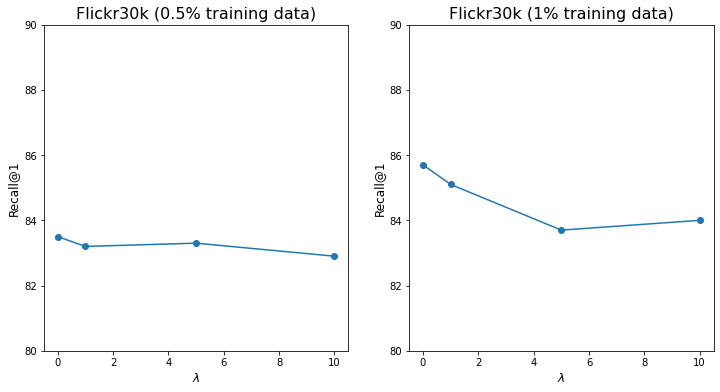

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
axes[0].plot(
    LAMBDA_VALUE_LIST,
    recall_145shots_list,
    marker="o",
)
axes[0].set_xlabel(r"$\lambda$", fontsize=12)
axes[0].set_ylabel("Recall@1", fontsize=12)
axes[0].set_title(
    f"{DATASET_FORMATTED_NAME_DICT[DATASET]} (0.5% training data)",
    fontsize=16,
)
axes[0].set_ylim([80, 90])

axes[1].plot(
    LAMBDA_VALUE_LIST,
    recall_290shots_list,
    marker="o",
)
axes[1].set_xlabel(r"$\lambda$", fontsize=12)
axes[1].set_ylabel("Recall@1", fontsize=12)
axes[1].set_title(
    f"{DATASET_FORMATTED_NAME_DICT[DATASET]} (1% training data)",
    fontsize=16,
)
axes[1].set_ylim([80, 90])

plt.show()